In [3]:
# 1. 导入库及读取数据
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统黑体
plt.rcParams['axes.unicode_minus'] = False    # 修复负号显示

df = pd.read_csv("nigerian-songs.csv")  # 以pandas库的read_csv函数读取csv文件
df.head()  # 查看前5行数据

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [4]:
# 2. 数据基本信息和缺失值统计
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [5]:
# 重命名列名为中文
df.columns = [
    '歌曲名称', '专辑名称', '歌手', '音乐风格', '发行日期', '时长', '流行度', 
    '可跳舞性', '原声感', '能量感', '纯乐器程度', '现场感', '响度', 
    '口语化程度', '曲速', '节拍']
print(df.head())  # 查看前5行数据

                       歌曲名称                          专辑名称  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                    歌手             音乐风格  发行日期      时长  流行度   可跳舞性     原声感  \
0        Cruel Santino  alternative r&b  2019  144000   48  0.666  0.8510   
1  Odunsi (The Engine)          afropop  2020   89488   30  0.710  0.0822   
2                 AYLØ        indie r&b  2018  207758   40  0.836  0.2720   
3           Lady Donli     nigerian pop  2019  175135   14  0.894  0.7980   
4  Odunsi (The Engine)          afropop  2018  152049   25  0.702  0.1160   

     能量感     纯乐器程度     现场感     响度   口语化程度       曲速  节拍  
0  0.420  0.534000  0.1100 -6.699  0.0829  133.015   5  
1  0.683  0.000169  0.1010 -5.640  0.3600  129.993   3  

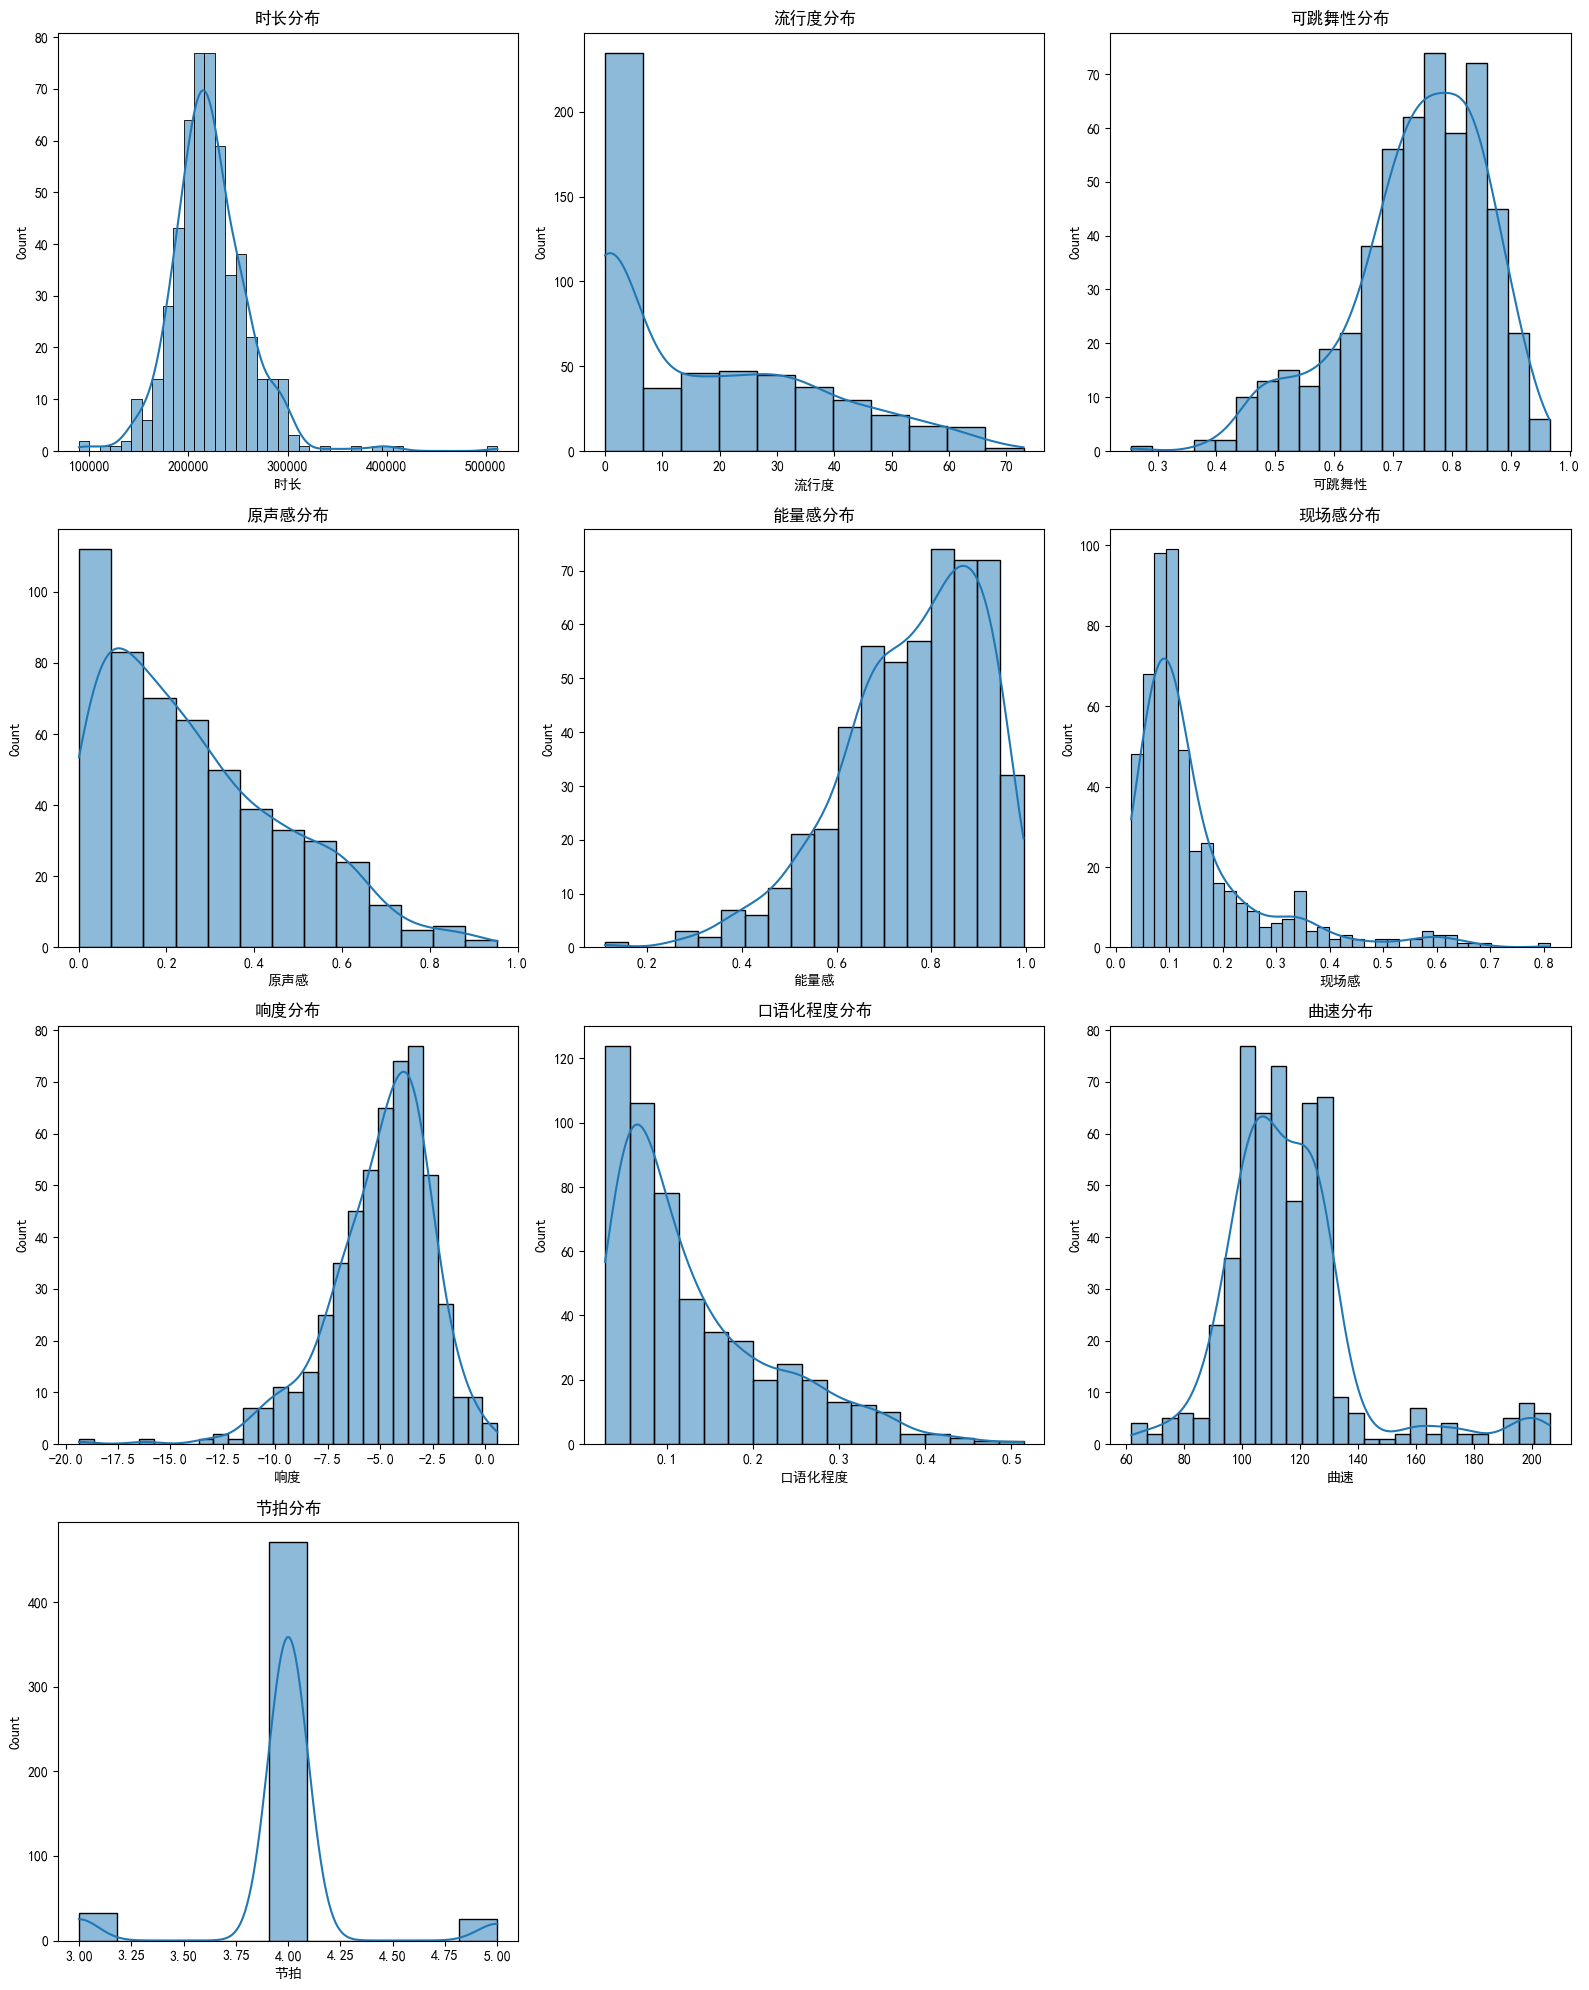

In [6]:
# 3. 探索性可视化分析
# 数值特征分布
num_cols = ['时长', '流行度', '可跳舞性', '原声感', '能量感', '现场感', '响度', '口语化程度', '曲速', '节拍']
plt.figure(figsize=(16, 20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}分布')
    plt.tight_layout()
plt.show()

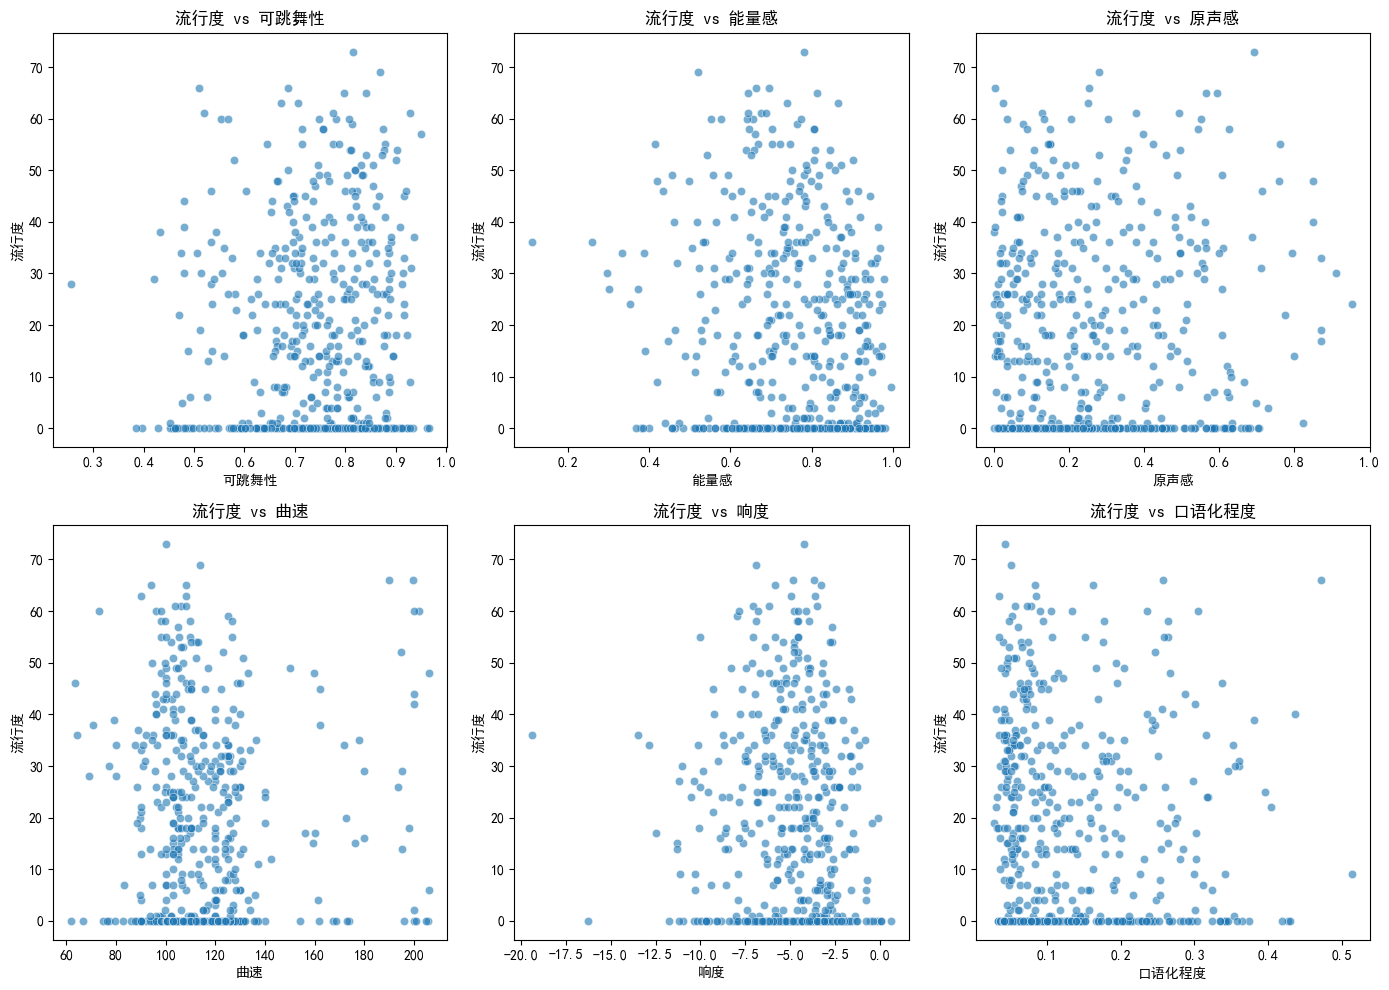

In [7]:
# 流行度与音乐特征的关系
plt.figure(figsize=(14, 10))
features = ['可跳舞性', '能量感', '原声感', '曲速', '响度', '口语化程度']
for i, feat in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=df[feat], y=df['流行度'], alpha=0.6)
    plt.title(f'流行度 vs {feat}')
plt.tight_layout()
plt.show()

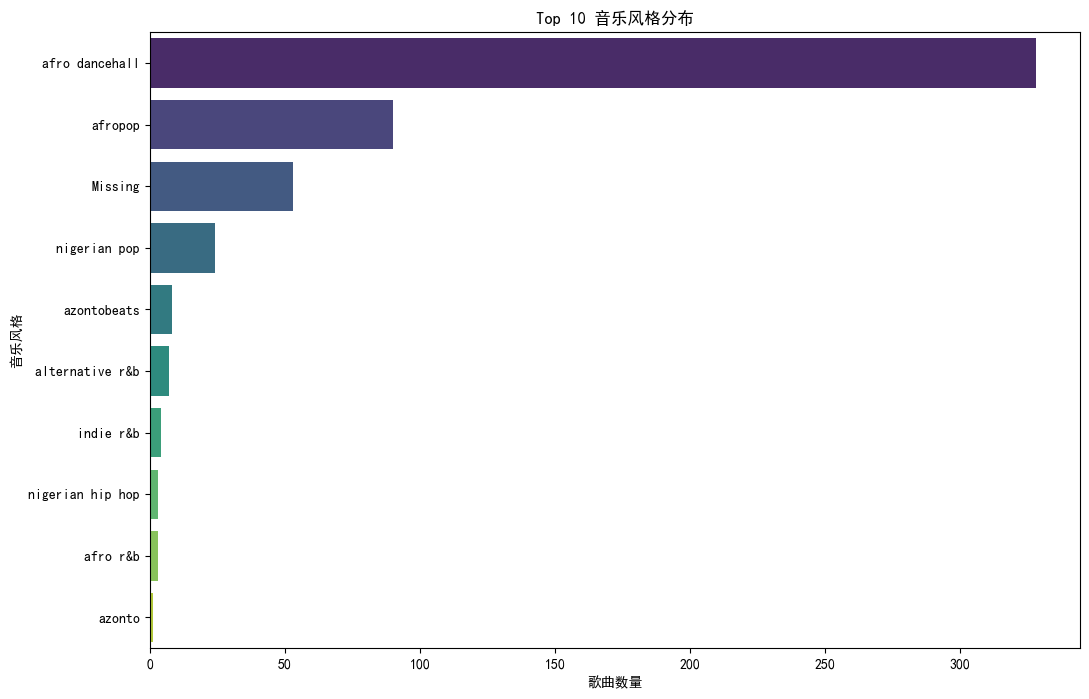

In [8]:
# 音乐风格分析
top_genres = df['音乐风格'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 音乐风格分布')
plt.xlabel('歌曲数量')
plt.ylabel('音乐风格')
plt.show()

<Axes: xlabel='发行日期'>

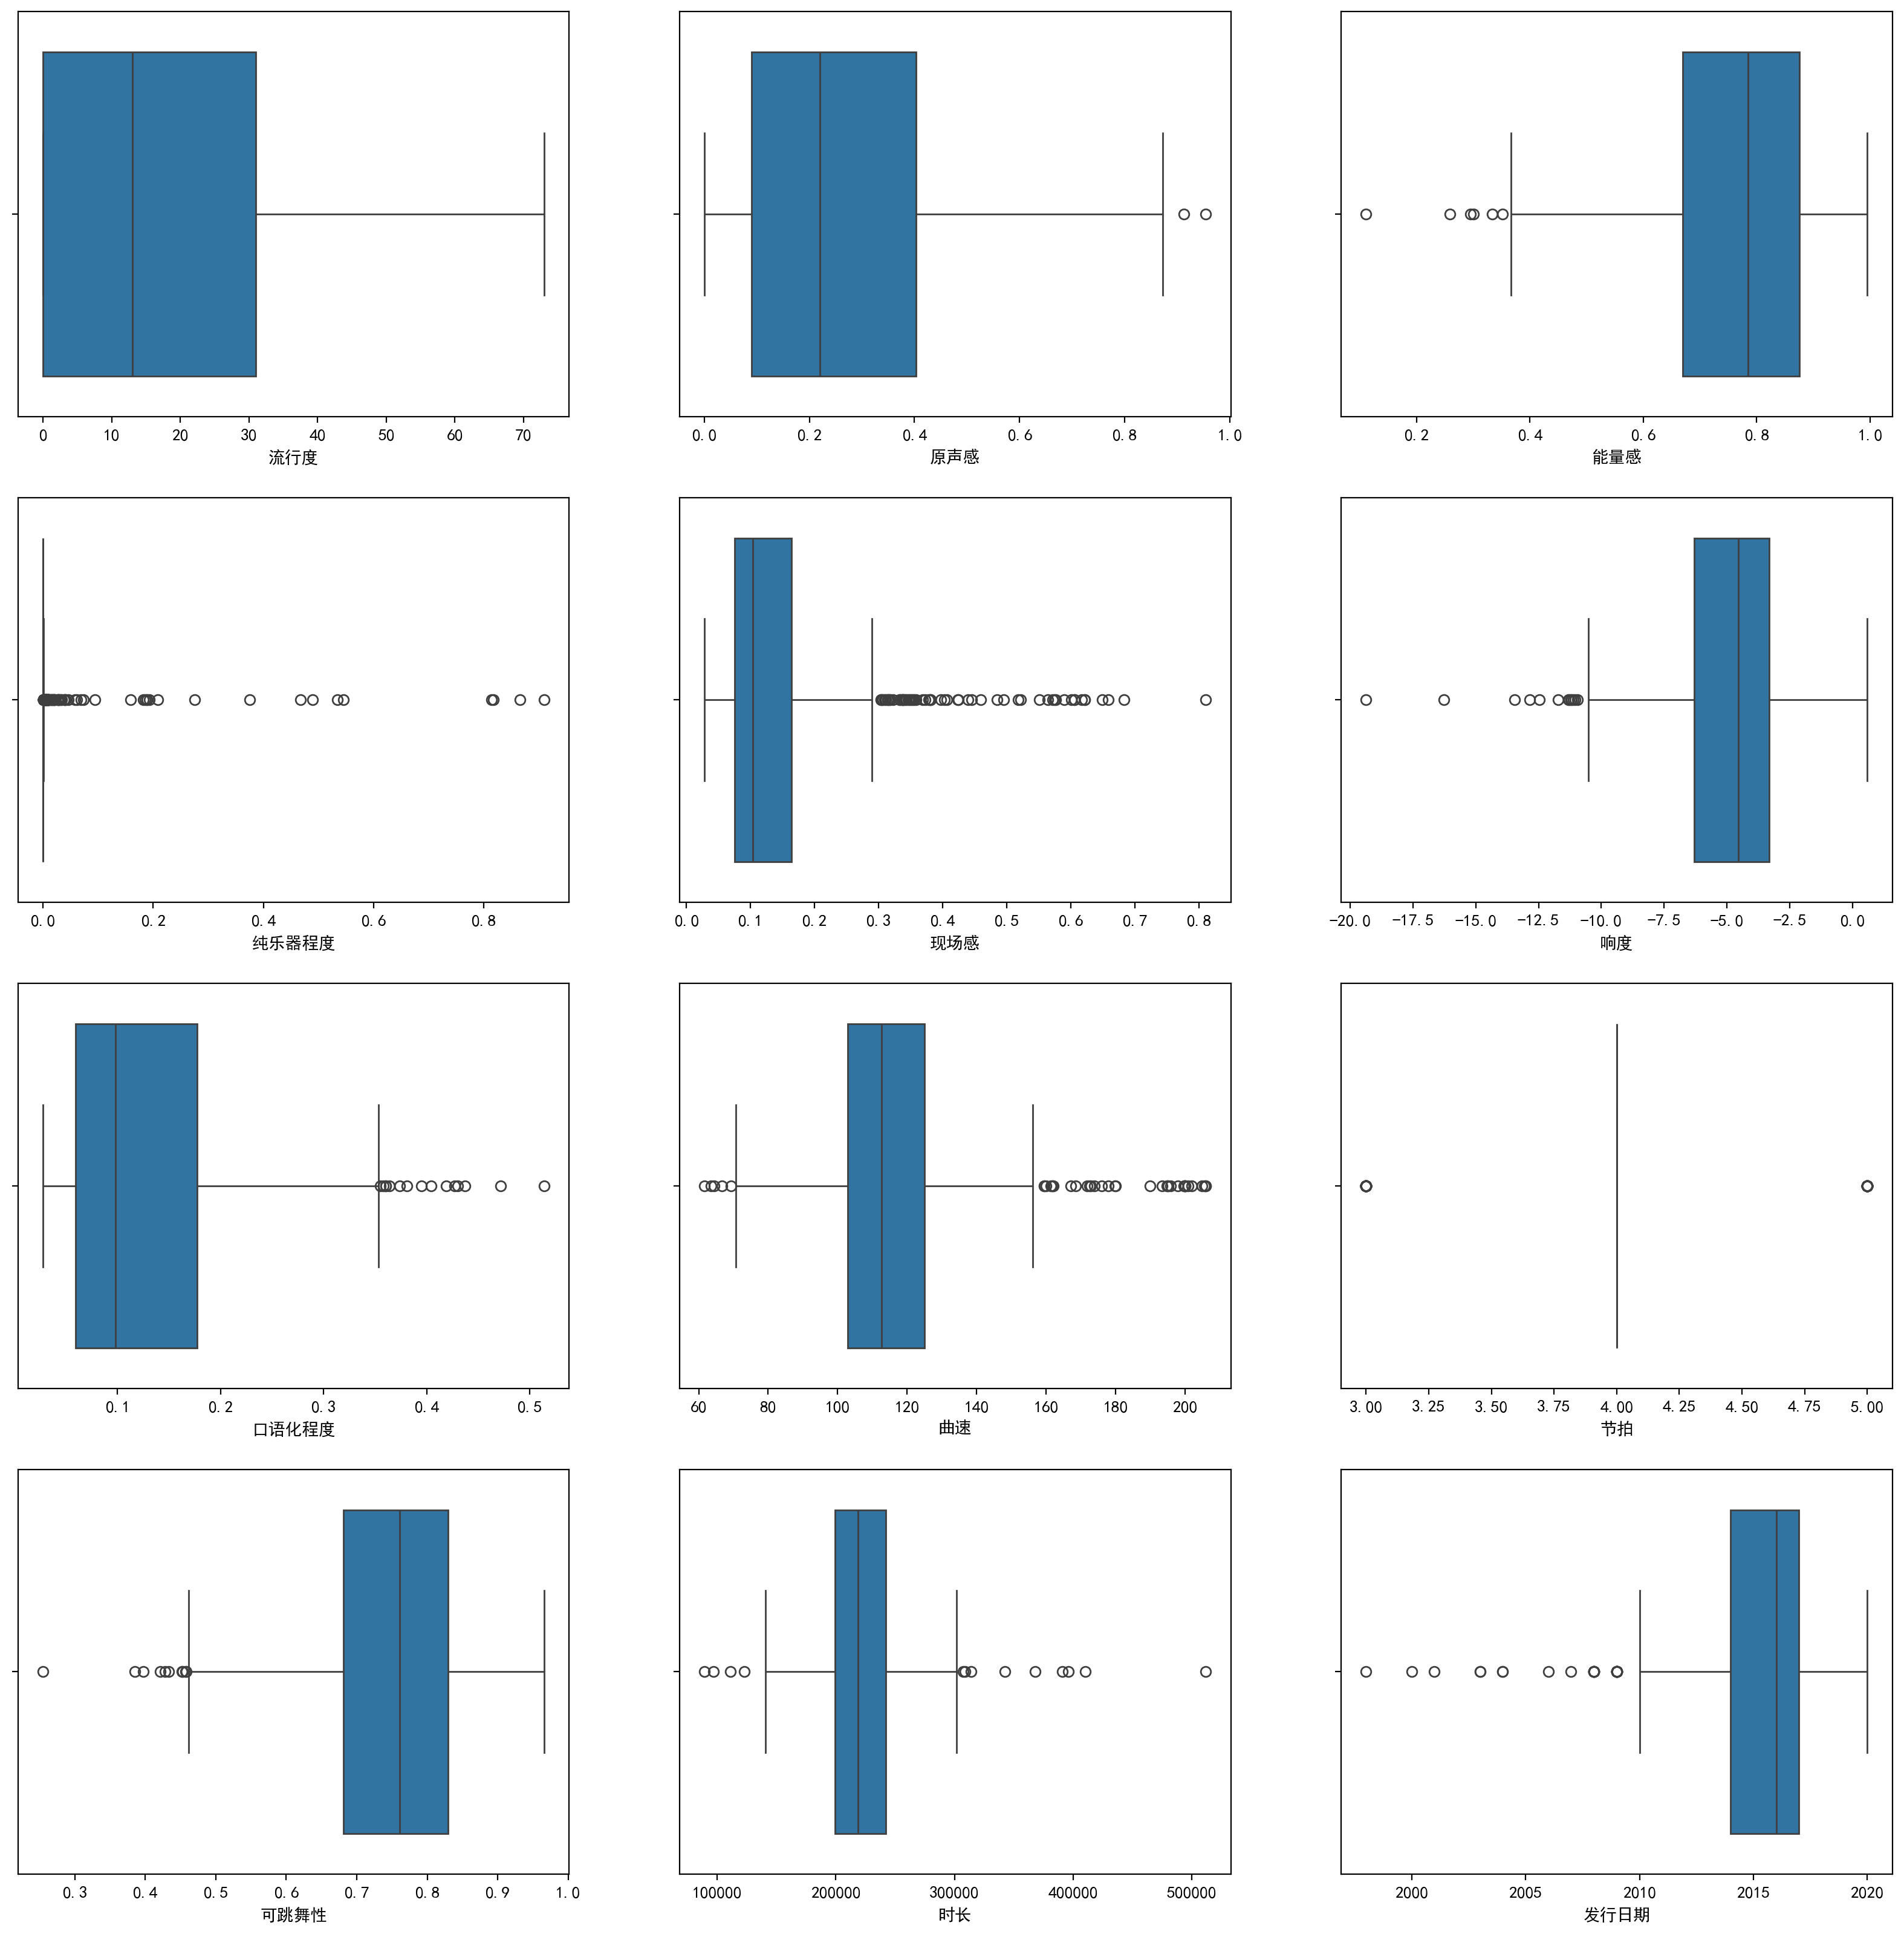

In [10]:
plt.figure(figsize=(20,20), dpi=200)
 
plt.subplot(4,3,1)
sns.boxplot(x = '流行度', data = df)
 
plt.subplot(4,3,2)
sns.boxplot(x = '原声感', data = df)
 
plt.subplot(4,3,3)
sns.boxplot(x = '能量感', data = df)
 
plt.subplot(4,3,4)
sns.boxplot(x = '纯乐器程度', data = df)
 
plt.subplot(4,3,5)
sns.boxplot(x = '现场感', data = df)
 
plt.subplot(4,3,6)
sns.boxplot(x = '响度', data = df)
 
plt.subplot(4,3,7)
sns.boxplot(x = '口语化程度', data = df)
 
plt.subplot(4,3,8)
sns.boxplot(x = '曲速', data = df)
 
plt.subplot(4,3,9)
sns.boxplot(x = '节拍', data = df)
 
plt.subplot(4,3,10)
sns.boxplot(x = '可跳舞性', data = df)
 
plt.subplot(4,3,11)
sns.boxplot(x = '时长', data = df)
 
plt.subplot(4,3,12)
sns.boxplot(x = '发行日期', data = df)

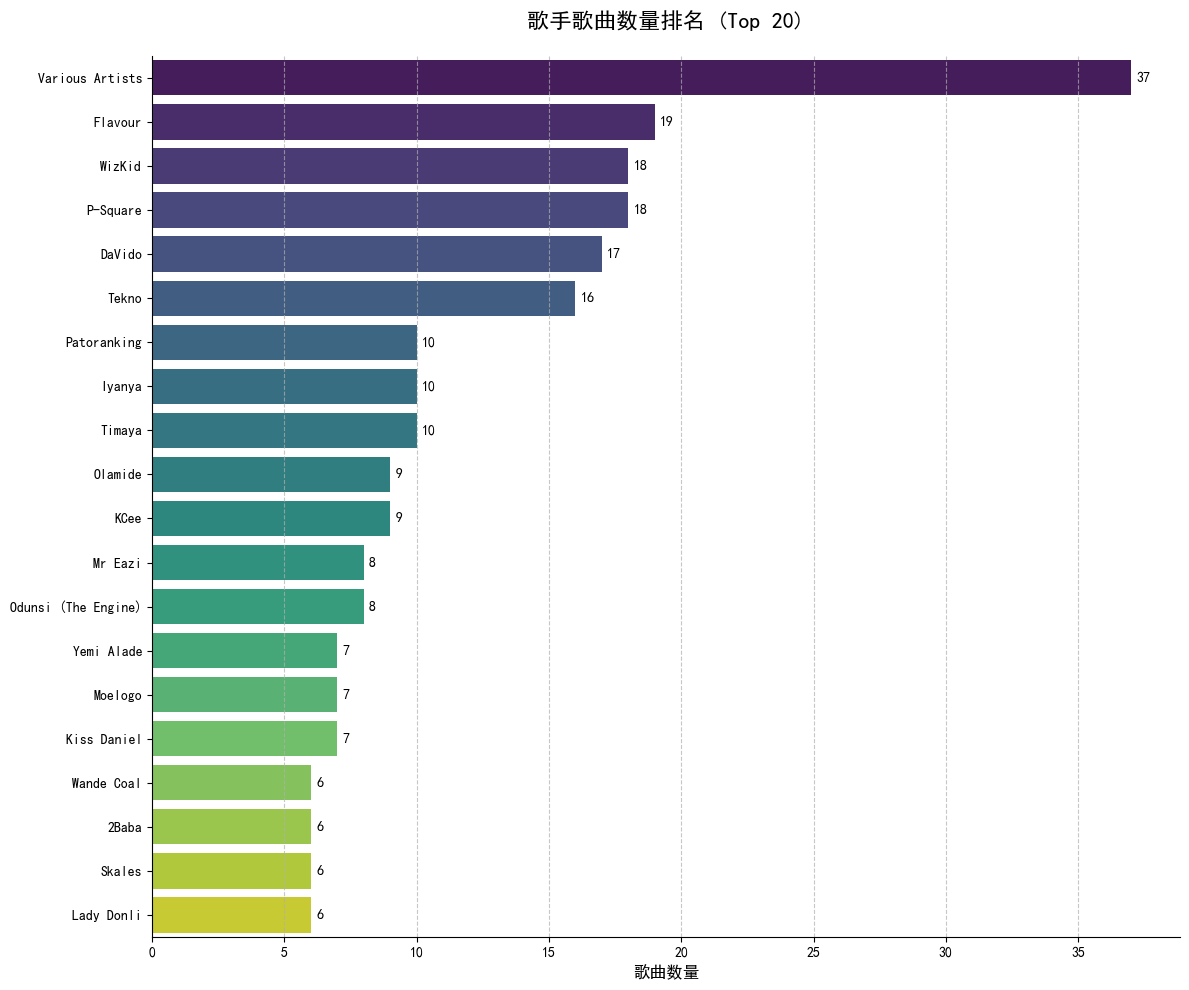

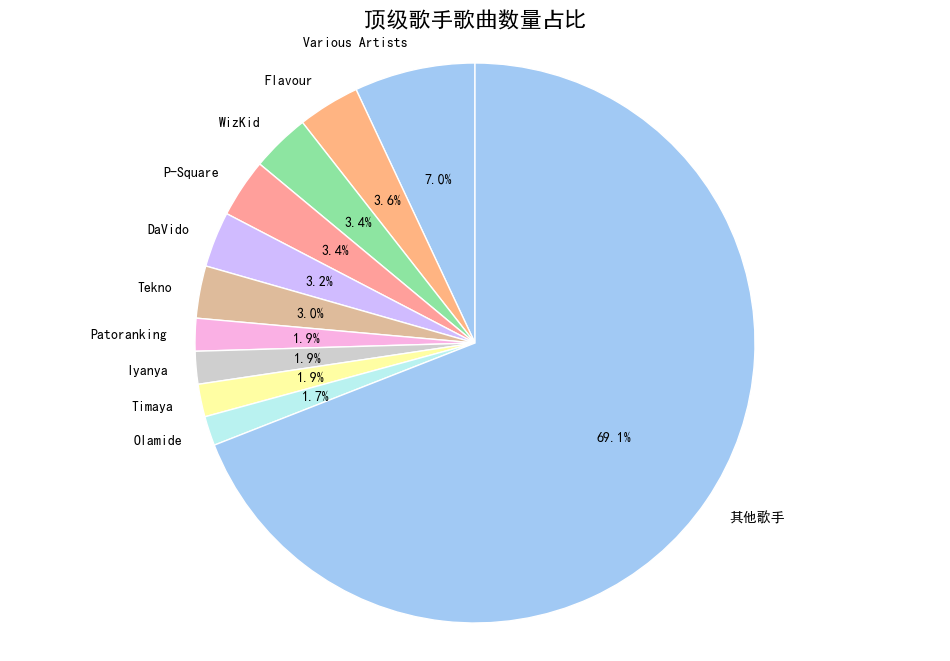

In [12]:
# 统计每个歌手的歌曲数量
song_counts = df['歌手'].value_counts().reset_index()
song_counts.columns = ['歌手', '歌曲数量']

# 获取歌曲数量最多的前20位歌手
top_artists = song_counts.head(20)

# 创建水平条形图
plt.figure(figsize=(12, 10))
barplot = sns.barplot(
    x='歌曲数量', 
    y='歌手', 
    data=top_artists,
    palette='viridis',  # 使用渐变色
    orient='h'          # 水平条形图
)

# 添加数据标签
for i, (count, artist) in enumerate(zip(top_artists['歌曲数量'], top_artists['歌手'])):
    barplot.text(count + 0.2, i, f'{count}', ha='left', va='center', fontsize=10)

# 美化图表
plt.title('歌手歌曲数量排名 (Top 20)', fontsize=16, pad=20)
plt.xlabel('歌曲数量', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 移除右边和上边的边框
sns.despine(right=True, top=True)
# 调整布局
plt.tight_layout()
# 显示图表
plt.show()

# 创建饼图展示顶级歌手占比（前10名）
top_10_artists = song_counts.head(10)
others_count = song_counts['歌曲数量'][10:].sum()

# 添加"其他"类别
pie_data = pd.concat([
    top_10_artists,
    pd.DataFrame({'歌手': ['其他歌手'], '歌曲数量': [others_count]})
])

plt.figure(figsize=(12, 8))
plt.pie(
    pie_data['歌曲数量'],
    labels=pie_data['歌手'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(pie_data)),
    wedgeprops={'edgecolor': 'w', 'linewidth': 1}
)
plt.title('顶级歌手歌曲数量占比', fontsize=16)
plt.axis('equal')  # 保证饼图是圆形
plt.show()

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# 数据预处理
# 选择数值特征并标准化
features = ['可跳舞性', '能量感', '原声感', '曲速', '响度', '口语化程度', '纯乐器程度', '现场感']
X = df[features].copy()

# 处理无穷值和缺失值
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

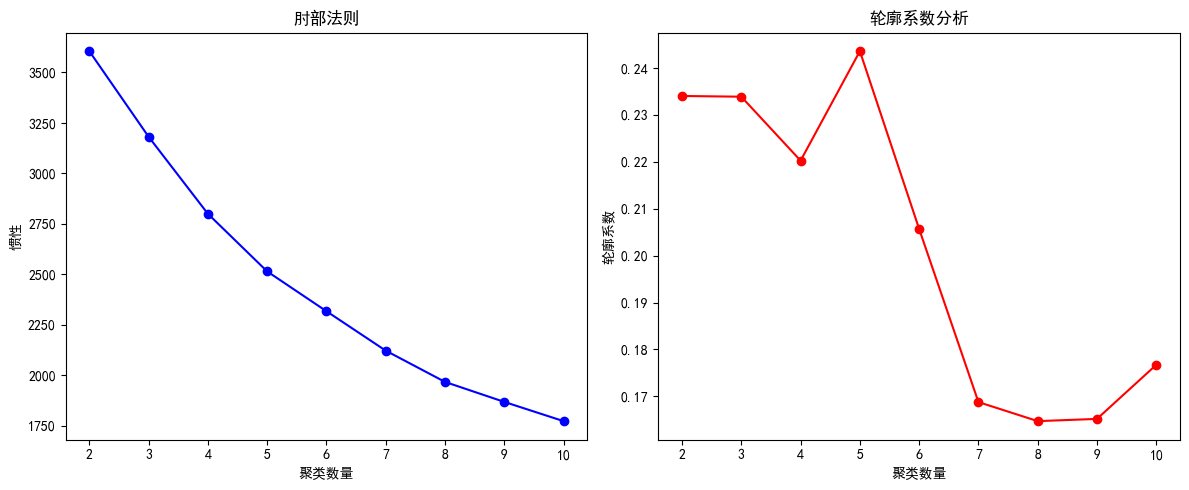

最佳聚类数: 5 (轮廓系数最高)


In [23]:
# K-means聚类
# 使用肘部法则确定最佳聚类数
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # 轮廓系数需要至少2个聚类
    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

# 肘部法则图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('聚类数量')
plt.ylabel('惯性')
plt.title('肘部法则')

# 轮廓系数图 - 修复后的版本
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'ro-')  # 使用所有9个值
plt.xlabel('聚类数量')
plt.ylabel('轮廓系数')
plt.title('轮廓系数分析')
plt.tight_layout()
plt.show()

# 选择最佳聚类数 (基于轮廓系数峰值)
optimal_k = np.argmax(silhouette_scores) + 2  # +2因为k从2开始
print(f"最佳聚类数: {optimal_k} (轮廓系数最高)")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['聚类'] = clusters

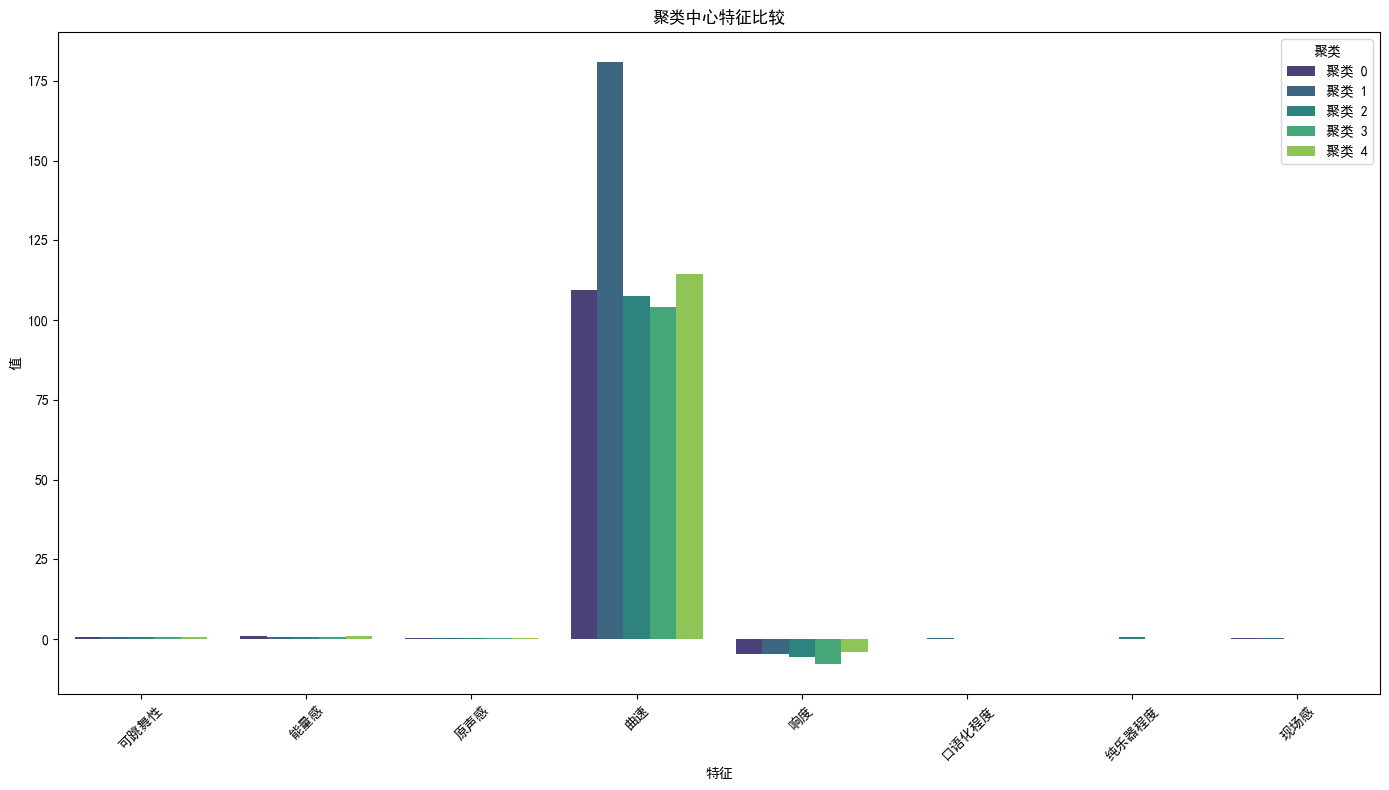

In [24]:
# 特征分析 - 聚类中心分析
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_center_df = pd.DataFrame(cluster_centers, columns=features)
cluster_center_df['聚类'] = [f'聚类 {i}' for i in range(optimal_k)]

# 聚类中心可视化
plt.figure(figsize=(14, 8))
cluster_center_melted = cluster_center_df.melt(id_vars='聚类', var_name='特征', value_name='值')
sns.barplot(x='特征', y='值', hue='聚类', data=cluster_center_melted, palette='viridis')
plt.title('聚类中心特征比较')
plt.xticks(rotation=45)
plt.legend(title='聚类')
plt.tight_layout()
plt.show()


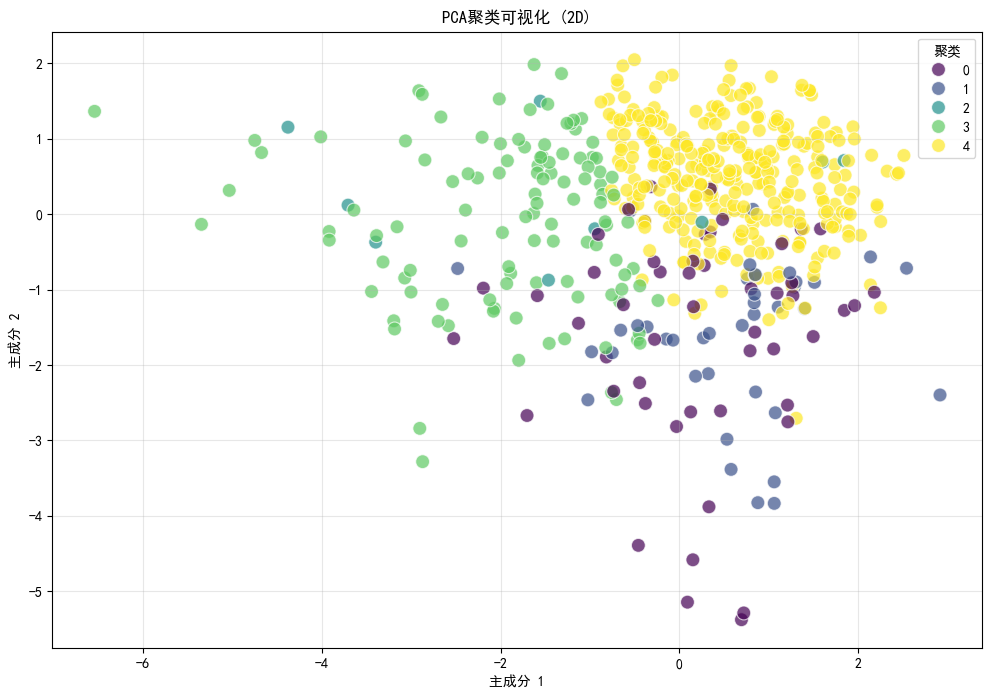

In [25]:
# PCA降维与可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 将PCA结果添加到DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# PCA可视化
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='聚类', data=df, 
                palette='viridis', alpha=0.7, s=100)
plt.title('PCA聚类可视化 (2D)')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend(title='聚类')
plt.grid(True, alpha=0.3)
plt.show()

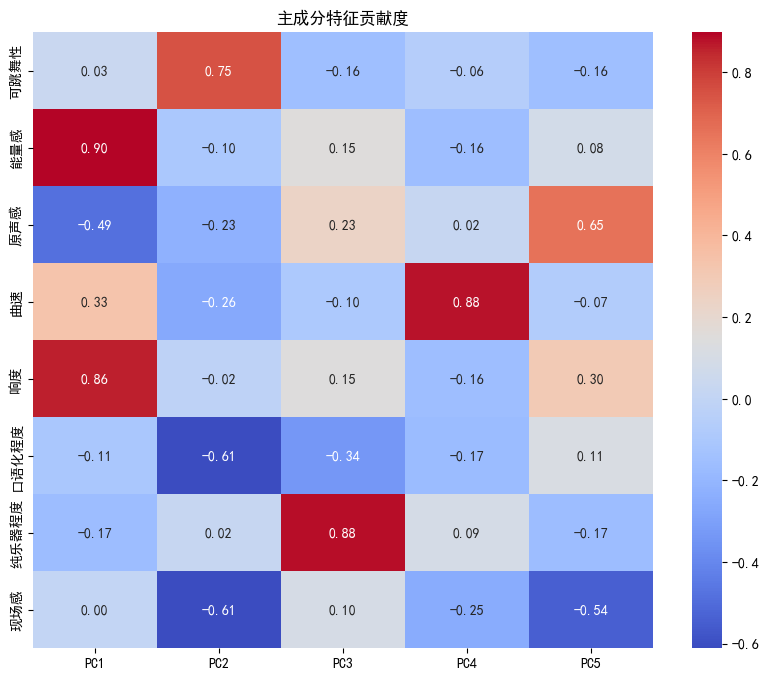

In [26]:
# 特征重要性分析
pca_full = PCA()
pca_full.fit(X_scaled)

# 主成分特征贡献度
loadings = pca_full.components_.T * np.sqrt(pca_full.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, len(features)+1)], index=features)

# 可视化特征贡献度
plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix.iloc[:, :5], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('主成分特征贡献度')
plt.show()

聚类特征均值分析:
        可跳舞性       能量感       原声感          曲速        响度     口语化程度     纯乐器程度  \
聚类                                                                           
0   0.687039  0.804725  0.256245  109.397941 -4.711686  0.157967  0.004474   
1   0.613868  0.752079  0.306142  180.791237 -4.732816  0.168924  0.003065   
2   0.733444  0.724556  0.328733  107.653222 -5.475778  0.109000  0.646444   
3   0.721161  0.572857  0.385079  103.995339 -7.807348  0.167038  0.007341   
4   0.772878  0.821341  0.218373  114.602653 -4.003900  0.109787  0.005177   

         现场感        流行度  
聚类                       
0   0.442745  13.843137  
1   0.171374  23.263158  
2   0.135433  19.000000  
3   0.127303  19.812500  
4   0.104702  16.559375  


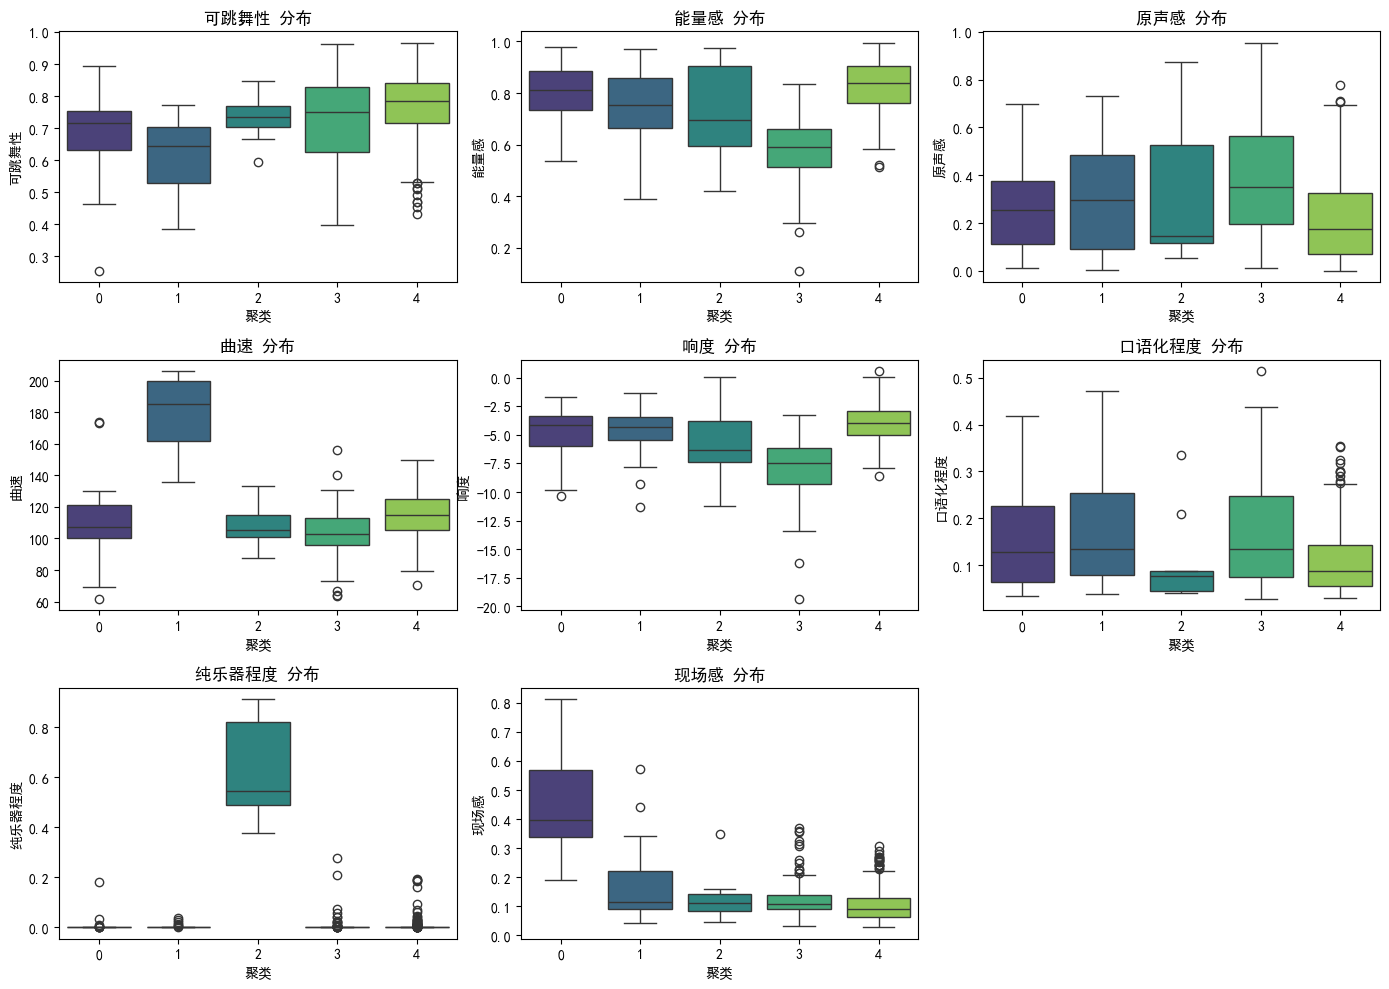

In [ ]:
# 聚类结果分析
cluster_analysis = df.groupby('聚类')[features + ['流行度']].mean()
print("聚类特征均值分析:")
print(cluster_analysis)

# 可视化聚类特征
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='聚类', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} 分布')
plt.tight_layout()
plt.show()